In [255]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

import sklearn.preprocessing as preproc

## Data Exploratory  

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Target variable
target = 'SalePrice'

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


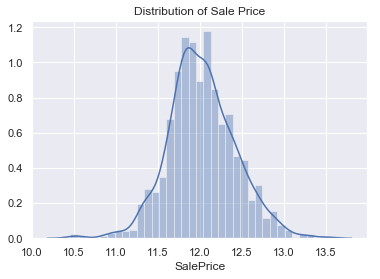

In [242]:
plt.figure()
sns.distplot(np.log(df_train['SalePrice']))
plt.title('Distribution of Sale Price')
plt.show()

### The target variable - sale price is a bit left skewed. 

Text(0.5, 1.0, 'Relationship with grlivarea')

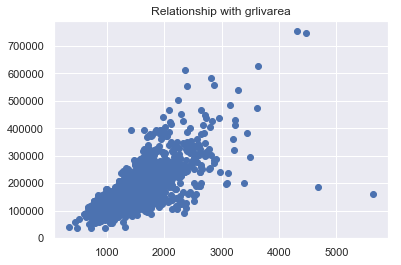

In [247]:
plt.figure()
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])
plt.title('Relationship with grlivarea')

/Users/ngjo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Relationship with TotalBsmtSF')

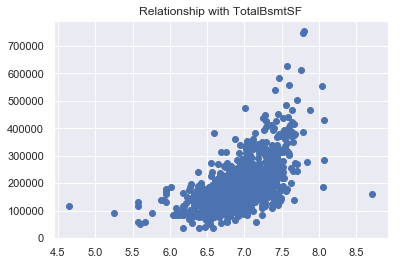

In [158]:
plt.figure()
plt.scatter(np.log(df_train['TotalBsmtSF']),df_train['SalePrice'])
plt.title('Relationship with TotalBsmtSF')

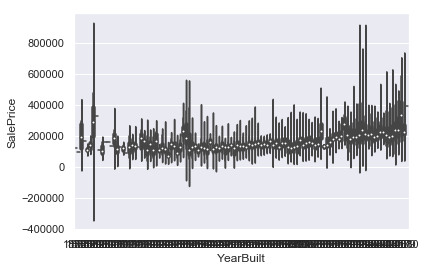

In [160]:
sns.violinplot(df_train['YearBuilt'],df_train['SalePrice'])

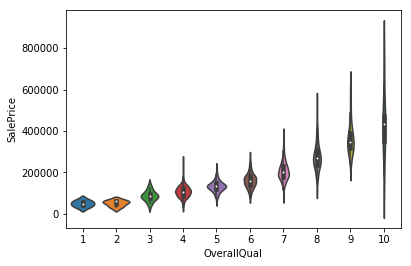

In [9]:
sns.violinplot(df_train['OverallQual'],df_train['SalePrice'])

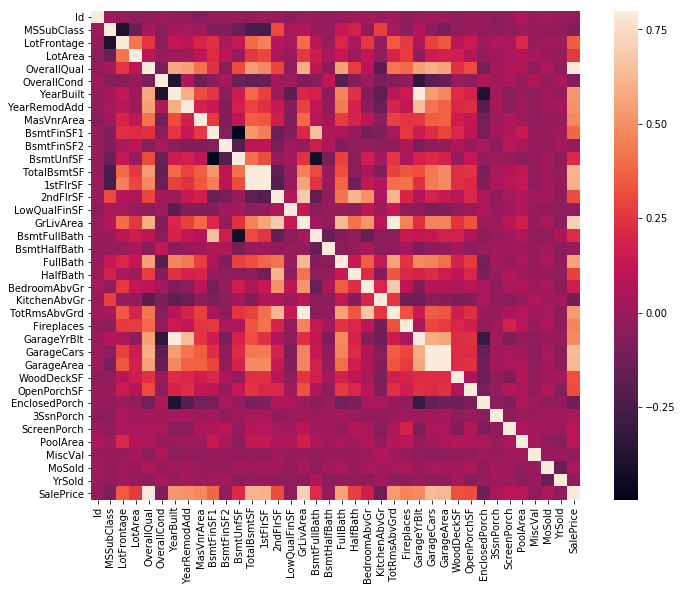

In [10]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


In [252]:
all_data_na = (df_train.isnull().sum() / len(df_train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

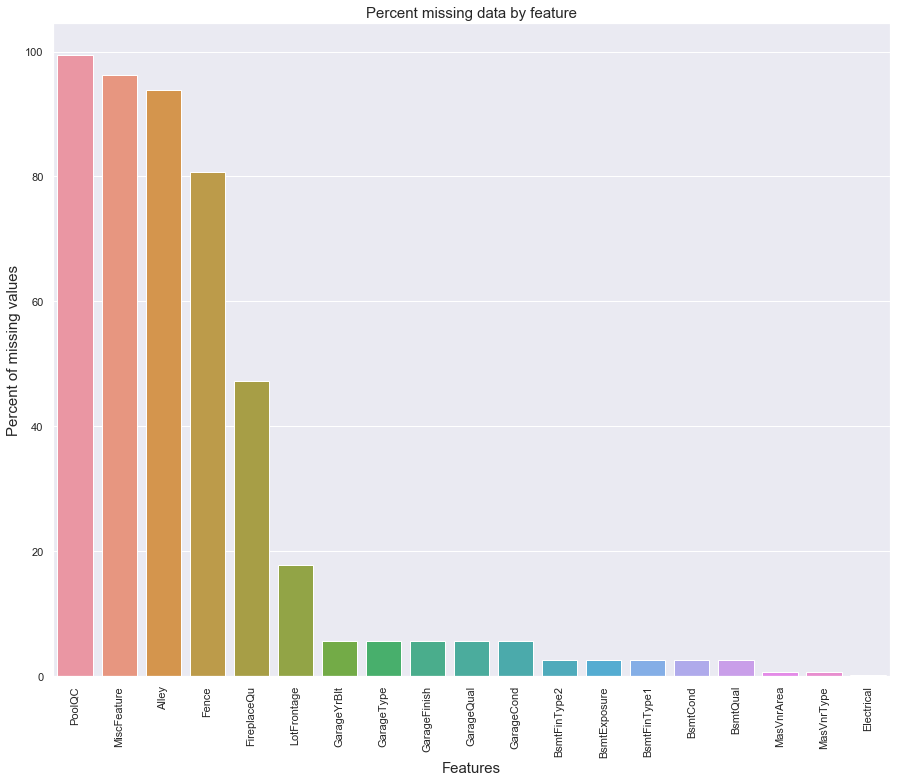

In [253]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


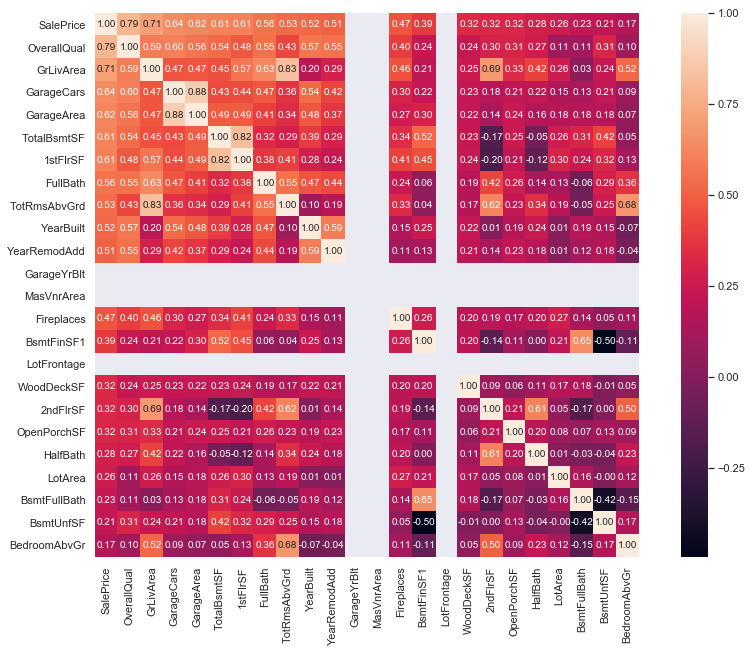

In [250]:
#saleprice correlation matrix
k = 24 #number of variables for heatmap
plt.figure(figsize=[15,10])
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



/Users/ngjo/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


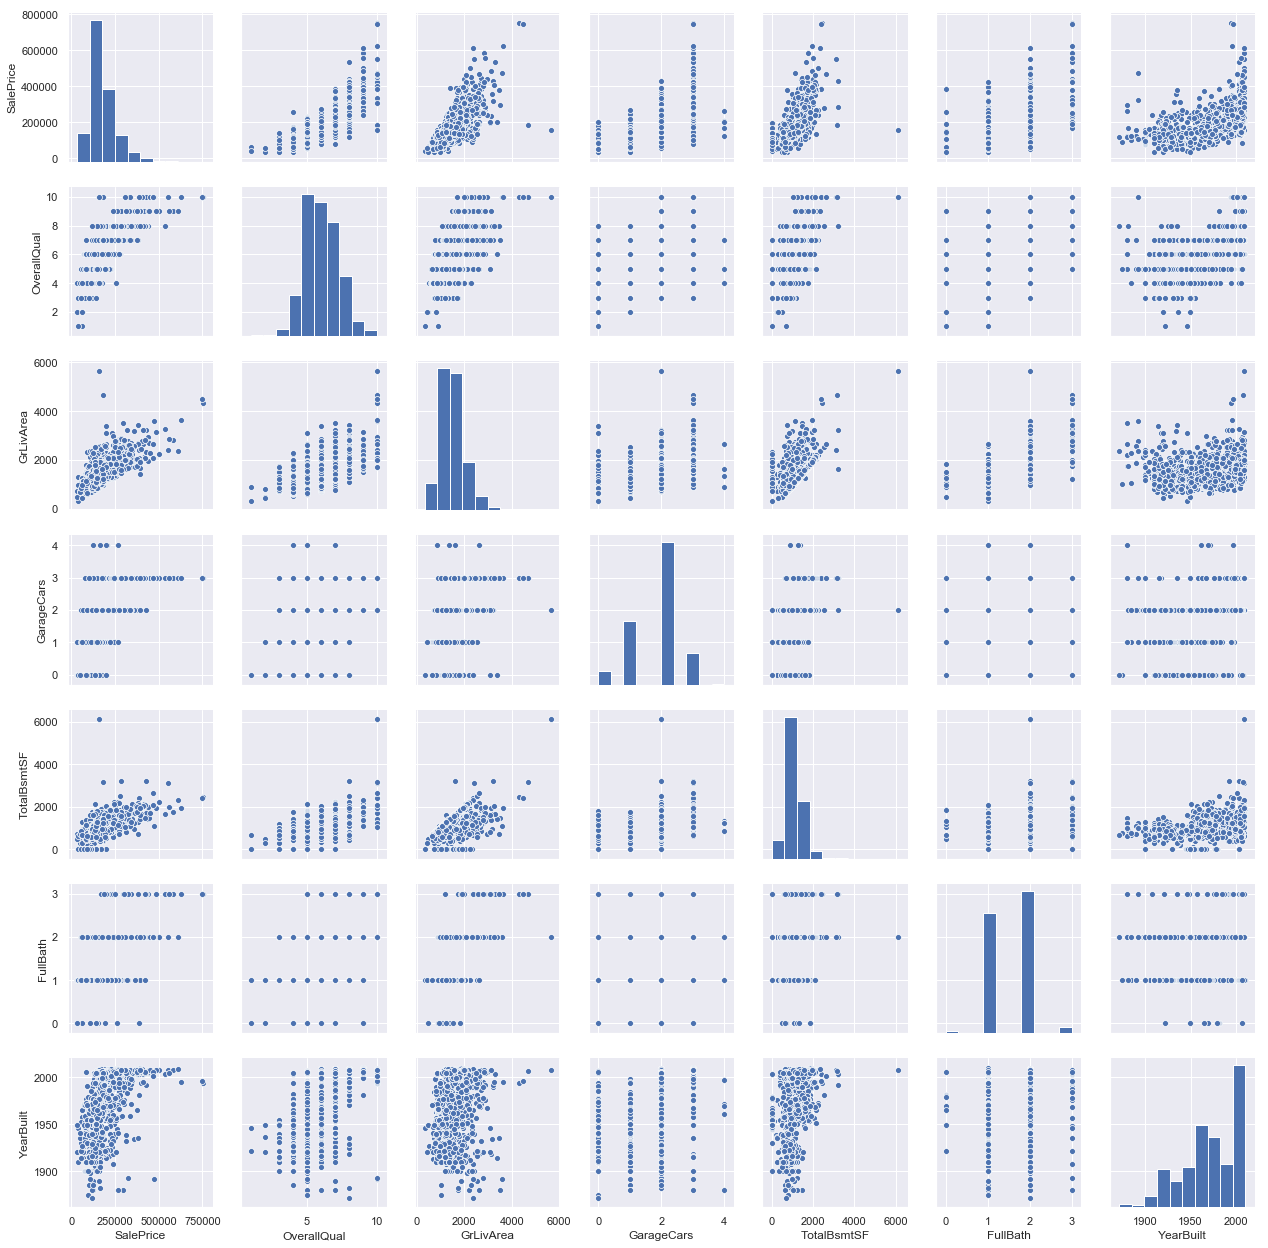

In [164]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# Results from analyzing informative categorical variables
LotShape: IR2 slightly worths more than IR1. Not super obvious. Need to do hypothesis testing to check significance

LandContour : HLS and Low seems to have a higher sales price



In [184]:
cat_cols = df_train.select_dtypes('object').columns
var_cols = df_train.select_dtypes('int').columns

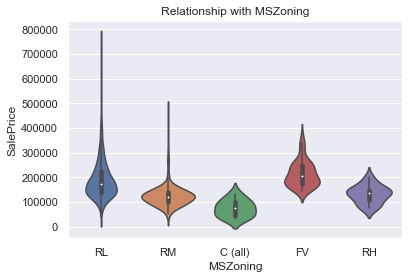

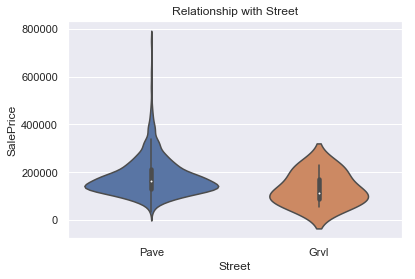

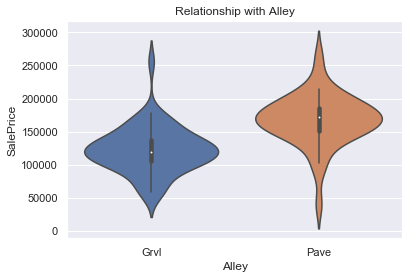

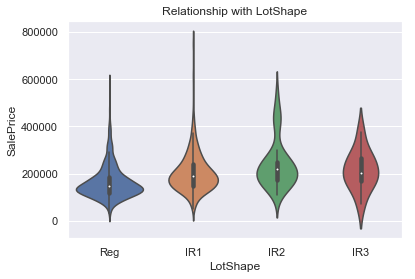

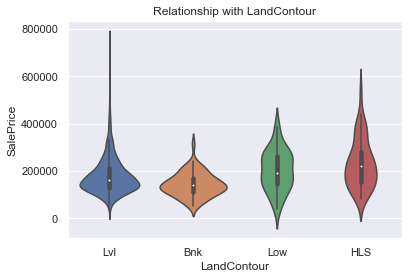

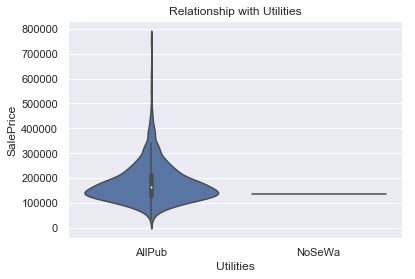

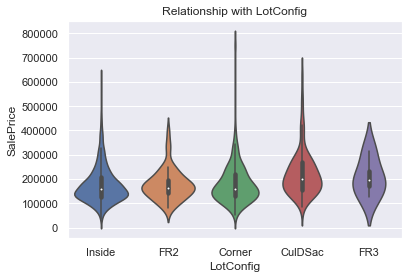

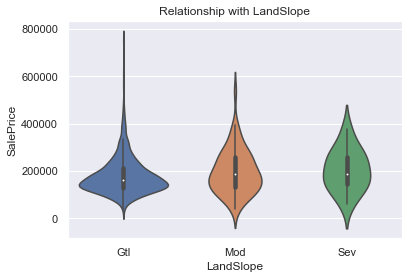

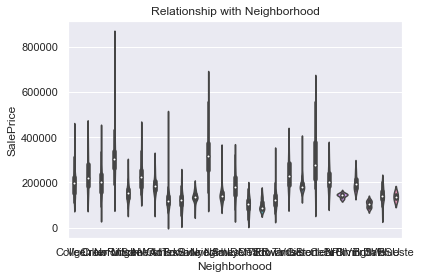

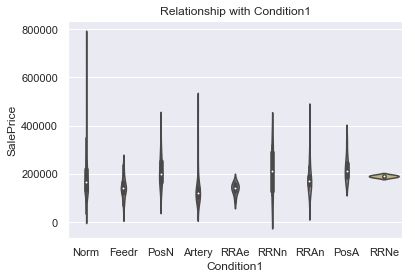

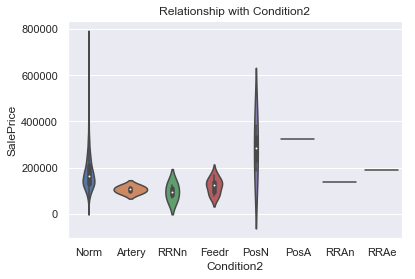

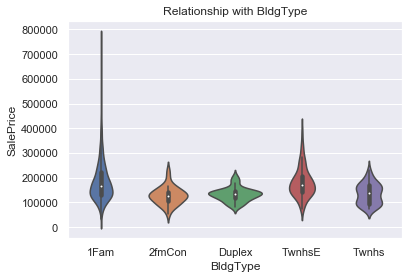

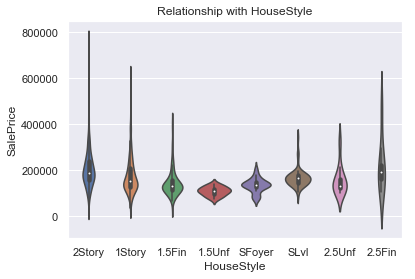

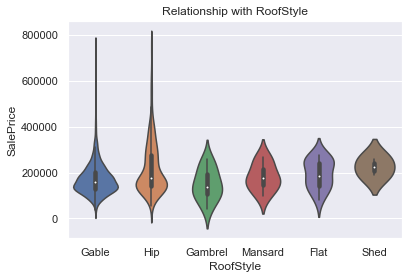

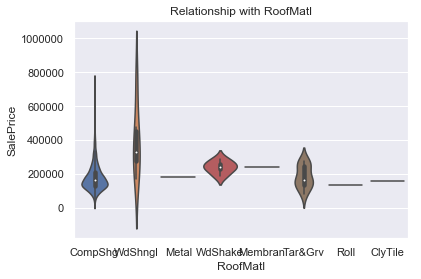

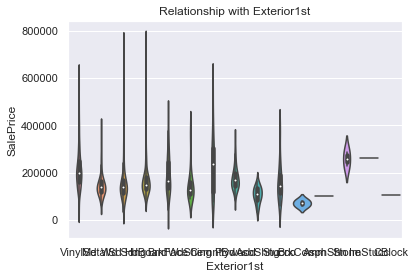

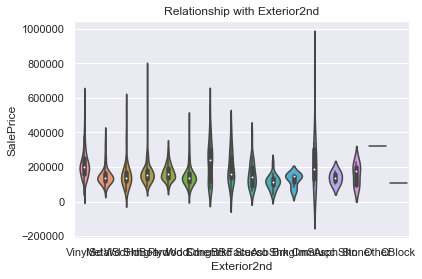

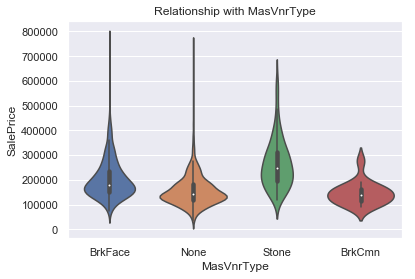

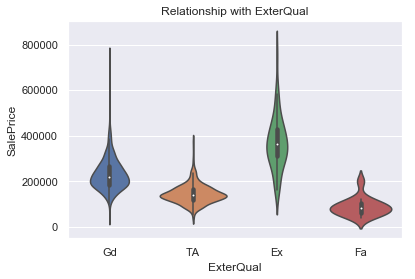

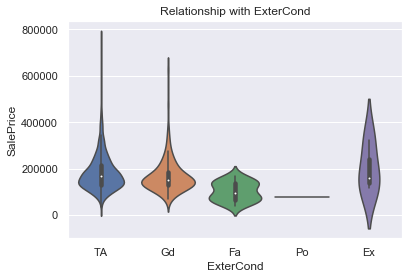

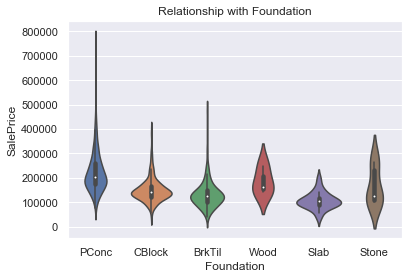

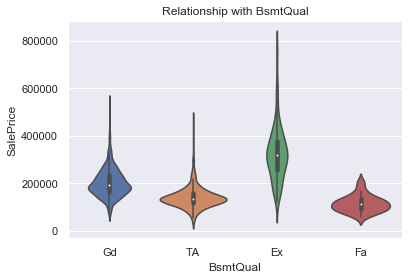

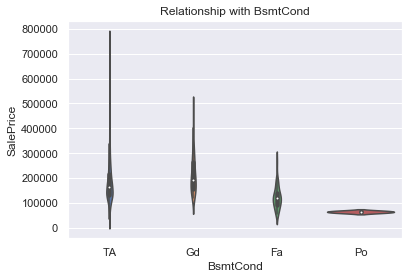

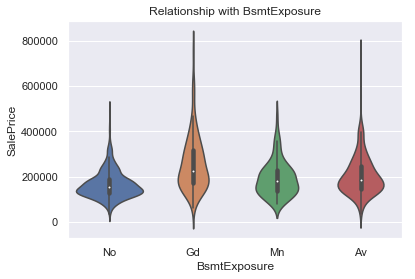

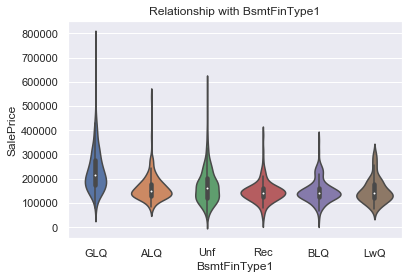

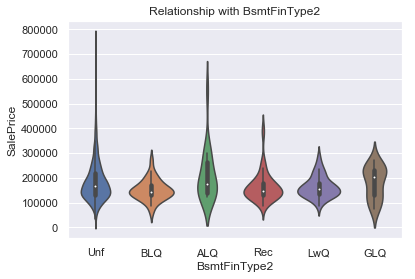

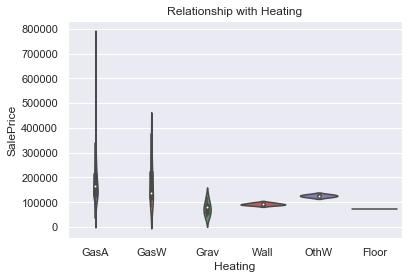

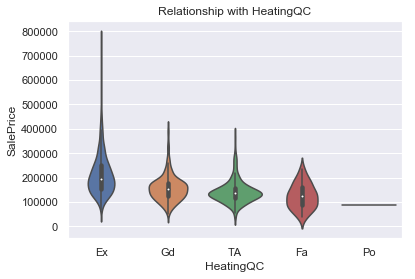

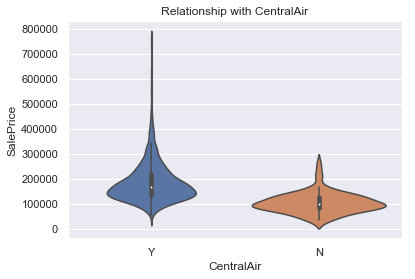

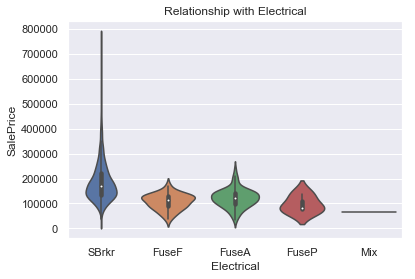

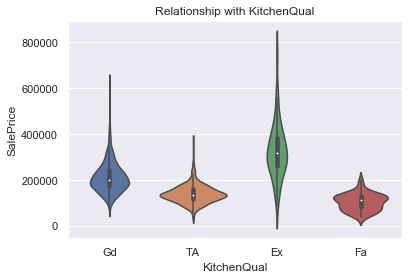

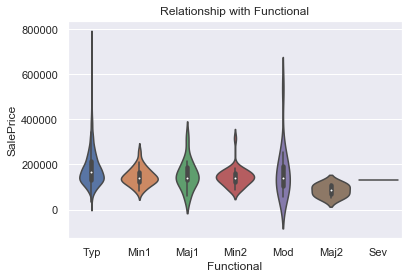

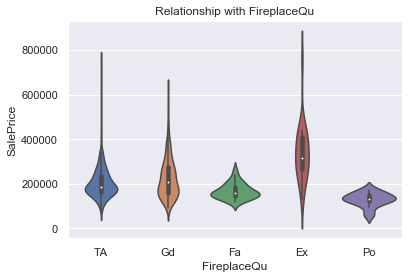

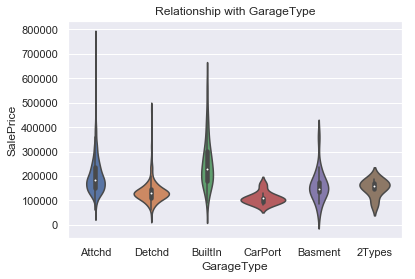

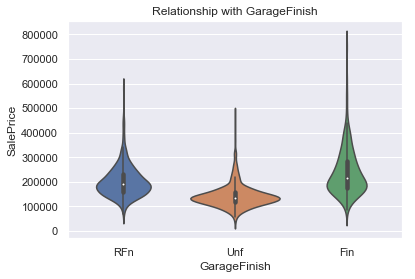

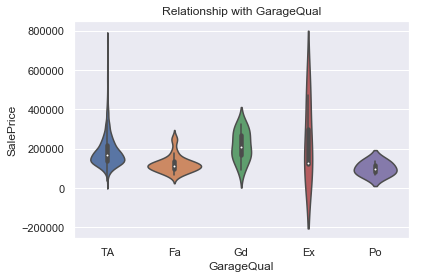

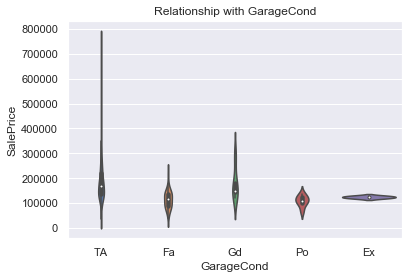

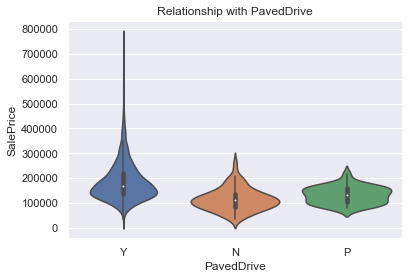

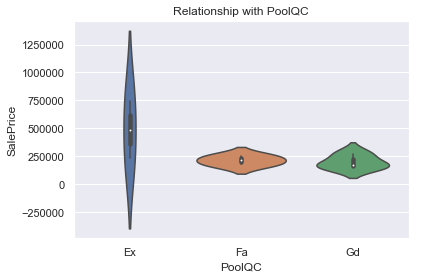

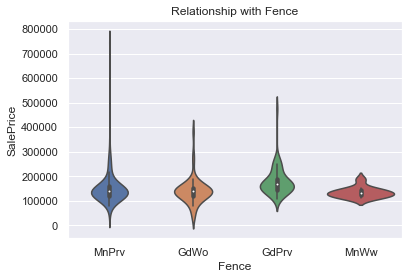

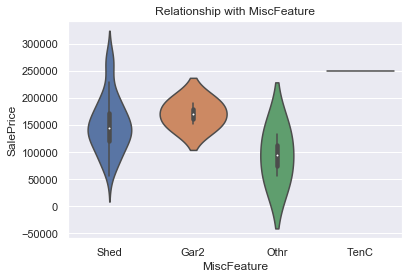

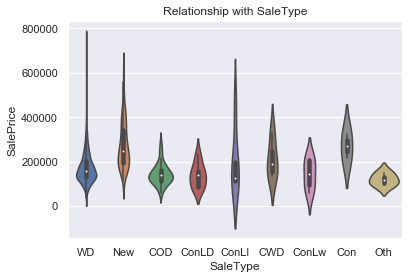

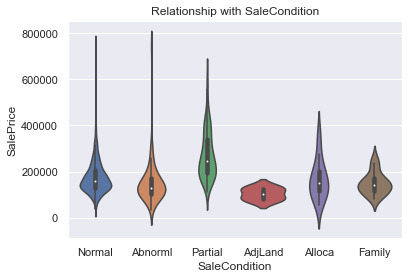

In [180]:
for col in cat_cols:
    plt.figure()
    sns.violinplot(df_train[col],df_train['SalePrice'])
    plt.title('Relationship with {}'.format(col))
    plt.show()



In [217]:
def one_hot_encode(df, cat_vars=None, num_vars=None):
    cat_df = pd.get_dummies(df[cat_vars])
    return cat_df

In [241]:
categorical_vars=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','SalePrice']

In [219]:
cat_feature = one_hot_encode(df_train, cat_vars=categorical_vars)

In [226]:
cat_feature.head()

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,181500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,223500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,140000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,250000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [238]:
cat_cols

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'Foundation_PConc',
       'ExterQual_Gd', 'ExterQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'GarageFinish_Fin', 'Neighborhood_NridgHt', 'SaleType_New',
       'SaleCondition_Partial', 'FireplaceQu_Gd', 'GarageType_Attchd',
       'MasVnrType_Stone', 'Neighborhood_NoRidge', 'KitchenQual_Gd',
       'BsmtExposure_Gd', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd',
       'GarageCond_TA', 'FireplaceQu_Ex', 'CentralAir_Y', 'GarageQual_TA',
       'MSZoning_RL', 'HouseStyle_2Story', 'Electrical_SBrkr', 'RoofStyle_Hip',
       'GarageType_BuiltIn', 'BsmtQual_Gd'],
      dtype='object')

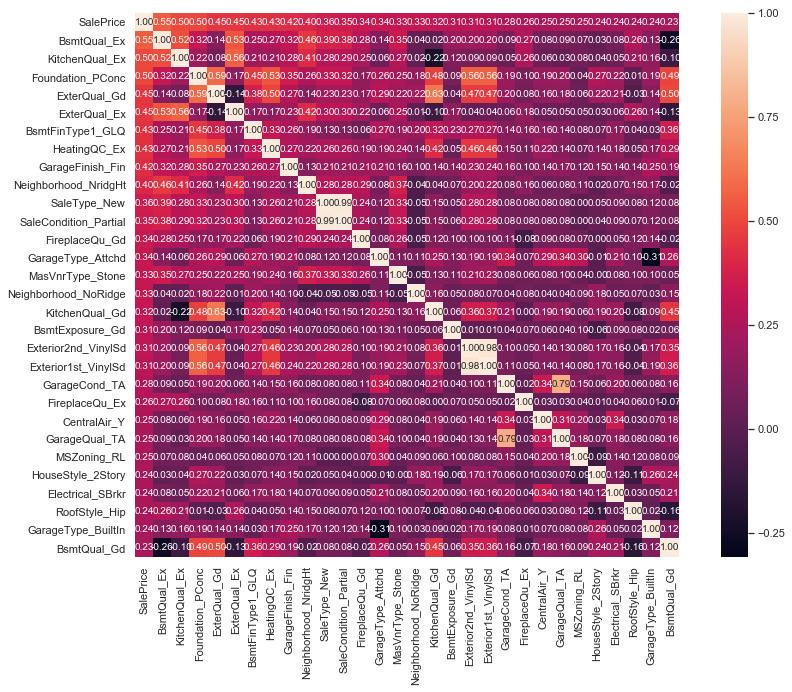

In [254]:
# correlation matrix for categorical
corr_cat = cat_feature.corr()
k = 30 #number of variables for heatmap
plt.figure(figsize=[15,10])
cat_cols = corr_cat.nlargest(k, 'SalePrice')['SalePrice'].index
cm_cat = np.corrcoef(cat_feature[cat_cols].values.T)
hm = sns.heatmap(cm_cat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cat_cols.values, xticklabels=cat_cols.values)
plt.show()
